# The N2 dataset

The N2 dataset provides features that are hypothesized to be informative for a progression to psychosis.   This notebook provides an overview of N2.

In [68]:
# Author: Rolf Carlson, Carlson Research LLC, <hrolfrc@gmail.com>
# License: 3-clause BSD

In [69]:
import pandas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

Get the input file path from the calf project

In [70]:
input_file_path = "../../../data/n2.csv"

Read the input file into a DataFrame

In [71]:
df = pandas.read_csv(input_file_path, header=0, sep=",")
df.head()

,ctrl/case,ADIPOQ,SERPINA3,AMBP,A2M,ACE,AGT,APOA1,APOA2,APOA4,...,CALCA,IL6,LTA,CSF3,PGF,GCG_0001,IL1B,TGFB3,FGF2,MDA-LDL
0,0,1.1538,-1.008,0.4650,-0.6181,-0.9350,1.7169,0.974,1.7821,-0.2580,...,-0.3688,0.8739,-0.2390,2.8335,0.4469,0.101,0.1688,-0.1861,1.9591,-0.0720
1,0,-0.7661,-1.039,1.2479,0.2220,-0.7140,2.6709,-0.275,0.1680,0.9759,...,-0.3688,1.5408,3.5482,-0.6669,-0.7770,1.015,0.1688,0.2689,-0.3498,-0.5491
2,0,-0.2721,-0.766,-0.7480,-1.0371,0.0459,-0.2940,0.046,0.9320,-0.5050,...,0.2562,0.2060,-0.8099,-0.6669,-0.7770,0.372,-0.5152,-0.1861,-0.3498,-0.5491
3,0,-0.8201,-1.281,0.4650,-0.1980,0.8059,0.8980,-0.954,-0.4270,-0.5050,...,-0.3688,-0.5718,-0.8099,-0.6669,-0.5050,-0.543,0.1688,0.2689,-0.5978,-0.5491
4,0,0.0019,-1.188,-0.7090,0.6421,0.2039,-0.3500,-0.275,0.5070,0.2349,...,0.0612,1.8737,1.0388,-0.6669,0.4469,0.575,-0.2332,-0.4131,0.4472,-0.5491


Remove the outcome column to get the independent variables

In [72]:
X = df.loc[:, df.columns != 'ctrl/case']
X.head()

,ADIPOQ,SERPINA3,AMBP,A2M,ACE,AGT,APOA1,APOA2,APOA4,APOH,...,CALCA,IL6,LTA,CSF3,PGF,GCG_0001,IL1B,TGFB3,FGF2,MDA-LDL
0,1.1538,-1.008,0.4650,-0.6181,-0.9350,1.7169,0.974,1.7821,-0.2580,2.6529,...,-0.3688,0.8739,-0.2390,2.8335,0.4469,0.101,0.1688,-0.1861,1.9591,-0.0720
1,-0.7661,-1.039,1.2479,0.2220,-0.7140,2.6709,-0.275,0.1680,0.9759,0.4610,...,-0.3688,1.5408,3.5482,-0.6669,-0.7770,1.015,0.1688,0.2689,-0.3498,-0.5491
2,-0.2721,-0.766,-0.7480,-1.0371,0.0459,-0.2940,0.046,0.9320,-0.5050,-0.0990,...,0.2562,0.2060,-0.8099,-0.6669,-0.7770,0.372,-0.5152,-0.1861,-0.3498,-0.5491
3,-0.8201,-1.281,0.4650,-0.1980,0.8059,0.8980,-0.954,-0.4270,-0.5050,1.3320,...,-0.3688,-0.5718,-0.8099,-0.6669,-0.5050,-0.543,0.1688,0.2689,-0.5978,-0.5491
4,0.0019,-1.188,-0.7090,0.6421,0.2039,-0.3500,-0.275,0.5070,0.2349,-0.6120,...,0.0612,1.8737,1.0388,-0.6669,0.4469,0.575,-0.2332,-0.4131,0.4472,-0.5491


In [73]:
# computing number of rows
rows = len(X.axes[0])

# computing number of columns
cols = len(X.axes[1])

print("Number of Rows (data points): ", rows)
print("Number of Columns (features or variables): ", cols)

Number of Rows (data points):  72
Number of Columns (features or variables):  135


In [74]:
Y = df['ctrl/case']

Y represents whether the individuals became psychotic (1) or not (0).  Y is a Pandas series.

In [75]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: ctrl/case, dtype: int64

In [76]:
Y.describe()

count    72.000000
mean      0.444444
std       0.500391
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ctrl/case, dtype: float64

The individuals who did not progress to psychosis are labeled non_psychotic.

In [77]:
non_psychotic = Y[Y == 0]
non_psychotic.head()

0    0
1    0
2    0
3    0
4    0
Name: ctrl/case, dtype: int64

The individuals who progressed to psychosis are labeled pre_psychotic.

In [78]:
pre_psychotic = Y[Y == 1]

In [79]:
pre_psychotic.head()

40    1
41    1
42    1
43    1
44    1
Name: ctrl/case, dtype: int64

In [80]:
Y_names = Y.replace({0: 'non_psychotic', 1: 'pre_psychotic'})
Y_names

0     non_psychotic
1     non_psychotic
2     non_psychotic
3     non_psychotic
4     non_psychotic
          ...      
67    pre_psychotic
68    pre_psychotic
69    pre_psychotic
70    pre_psychotic
71    pre_psychotic
Name: ctrl/case, Length: 72, dtype: object

## Fit N2

In [81]:
lr = LogisticRegression().fit(X, Y)

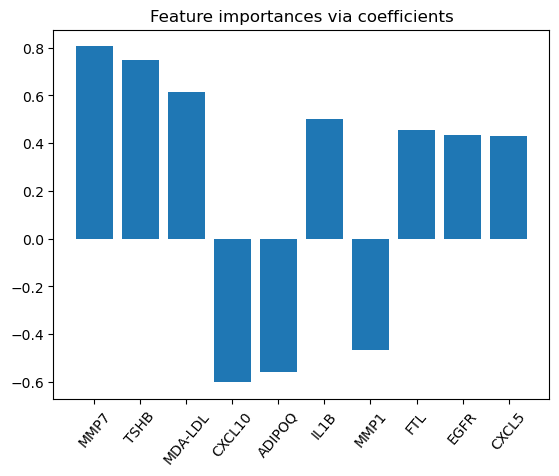

In [82]:
importance = lr.coef_.tolist()[0]
# Find the 5 most important coefficients and features
# Operate on the coefficients and features as tuples
# maintain the association as they are sorted and selected.
tup = list(zip(importance, X.columns))
tup = sorted(tup,  key=lambda c: abs(c[0]), reverse=True)[0:10]
tup = [c for c in tup if not math.isclose(c[0], 0)]

s, f = list(zip(*tup))

fig, ax = plt.subplots()
ax.bar(height=s, x=f)

plt.xticks(rotation=50)
plt.title("Feature importances via coefficients")
plt.show()

## Most important coefficients and features written as a sum

In [83]:
i, j = tup[0]
s = str(round(i, 3)) + " " +str(j)
for i, j in tup[1:]:
    if i < 0:
        sgn = ' '
    else:
        sgn = ' + '
    s = s + sgn + str(round(i, 3)) + " " +str(j)
print(s)

0.805 MMP7 + 0.75 TSHB + 0.614 MDA-LDL -0.602 CXCL10 -0.558 ADIPOQ + 0.502 IL1B -0.469 MMP1 + 0.456 FTL + 0.434 EGFR + 0.431 CXCL5


## The ROC AUC score

In [84]:
y_score = lr.predict(X)
# Using all the data should result in an AUC near 1
roc_auc_score(Y, y_score)

1.0

## ROC curve with an AUC = 1

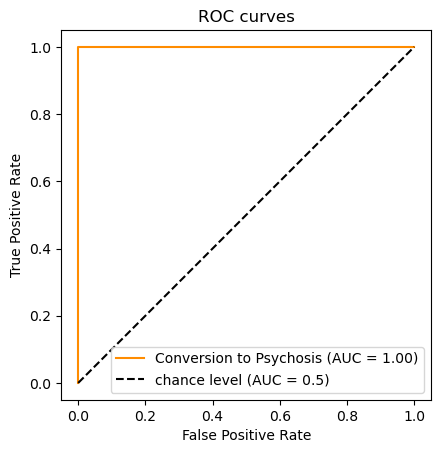

In [85]:
RocCurveDisplay.from_predictions(
    Y,
    y_score,  
    name="Conversion to Psychosis",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves")
plt.legend()
plt.show()

## The classifier does not learn from the training data.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), Y.copy(),
    random_state=42
)

In [87]:
y_score =  LogisticRegression().fit(X_train, y_train).predict(X_test)
# Using all the data should result in an AUC near 1
roc_auc_score(y_test, y_score)

0.48701298701298695